In [20]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install openpyxl

df = pd.read_excel(r"C:\Users\Admin\OneDrive\Desktop\Complete_Sales_Analysis_Project_Dataset.xlsx", sheet_name="Orders")
products = pd.read_excel(r"C:\Users\Admin\OneDrive\Desktop\Complete_Sales_Analysis_Project_Dataset.xlsx", sheet_name="Products")

df = df.merge(products, on="Product_ID")


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Admin\\OneDrive\\Desktop\\Complete_Sales_Analysis_Project_Dataset.xlsx'

In [21]:
df.head()

,Order_ID,Order_Date,Customer_ID,Product_ID,Region,Sales,Quantity,Discount,Shipping_Cost,Profit,Category,Sub_Category,Cost_Price,Month
0,1,2025-04-13,134,6,South,10822.65,4,0.12,122.47,657.46,Furniture,Sofa,2186,4
1,2,2025-06-29,358,7,East,5345.83,5,0.21,357.81,-144.60,Office Supplies,Paper,802,6
2,3,2025-04-03,45,8,West,5416.73,2,0.14,358.05,390.34,Office Supplies,Binder,1955,4
3,4,2025-01-15,344,2,West,4165.27,5,0.05,264.70,717.31,Electronics,Laptop,595,1
4,5,2025-04-17,311,3,South,4124.81,5,0.16,261.45,328.39,Electronics,Accessories,575,4


In [34]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.month

In [35]:
#Revenue & Margin Trend Check

monthly_summary = df.groupby('Month').agg({
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

monthly_summary['Profit_Margin'] = (monthly_summary['Profit'] / monthly_summary['Sales']) * 100

monthly_summary

,Month,Sales,Profit,Profit_Margin
0,1,1622351.76,258010.25,15.903472
1,2,1468745.56,167572.65,11.409236
2,3,1460585.69,113396.83,7.763792
3,4,1609230.98,48544.31,3.016615
4,5,1539865.58,-26317.75,-1.709094
5,6,1545670.28,-100552.41,-6.505424


In [51]:
#Monthly Revenue Share by Category

monthly_cat = df.groupby(['Month','Category'])['Sales'].sum().reset_index()

monthly_total = df.groupby('Month')['Sales'].sum().reset_index()
monthly_total.columns = ['Month','Total_Sales']

monthly_cat = monthly_cat.merge(monthly_total, on='Month')

monthly_cat['Revenue_Share_%'] = (monthly_cat['Sales'] / monthly_cat['Total_Sales']) * 100

monthly_cat.sort_values(['Month','Category'])

,Month,Category,Sales,Total_Sales,Revenue_Share_%
0,1,Electronics,278507.62,1622351.76,17.166907
1,1,Furniture,739792.61,1622351.76,45.600013
2,1,Office Supplies,604051.53,1622351.76,37.233080
3,2,Electronics,300557.31,1468745.56,20.463538
4,2,Furniture,735456.40,1468745.56,50.073779
5,2,Office Supplies,432731.85,1468745.56,29.462683
6,3,Electronics,271284.19,1460585.69,18.573658
7,3,Furniture,804336.24,1460585.69,55.069432
8,3,Office Supplies,384965.26,1460585.69,26.356910
9,4,Electronics,284003.34,1609230.98,17.648389


In [52]:
#Monthly Category Margin

monthly_margin = df.groupby(['Month','Category']).apply(
    lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100
).reset_index(name='Margin_%')

monthly_margin

C:\Users\Admin\AppData\Local\Temp\ipykernel_6264\3749755235.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_margin = df.groupby(['Month','Category']).apply(


,Month,Category,Margin_%
0,1,Electronics,12.352226
1,1,Furniture,16.799373
2,1,Office Supplies,16.443604
3,2,Electronics,8.564493
4,2,Furniture,13.493942
5,2,Office Supplies,9.841980
6,3,Electronics,4.013374
7,3,Furniture,9.181603
8,3,Office Supplies,7.444365
9,4,Electronics,-0.207339


In [53]:
#Correlation Analysis

df[['Discount','Profit','Shipping_Cost','Sales']].corr()

,Discount,Profit,Shipping_Cost,Sales
Discount,1.000000,-0.553151,-0.002785,0.008707
Profit,-0.553151,1.000000,-0.123645,0.566769
Shipping_Cost,-0.002785,-0.123645,1.000000,0.010975
Sales,0.008707,0.566769,0.010975,1.000000


In [46]:
#Compare Impact Strength

print("Discount vs Profit:", df['Discount'].corr(df['Profit']))
print("Shipping vs Profit:", df['Shipping_Cost'].corr(df['Profit']))

Discount vs Profit: -0.55315144177069
Shipping vs Profit: -0.12364505098982066


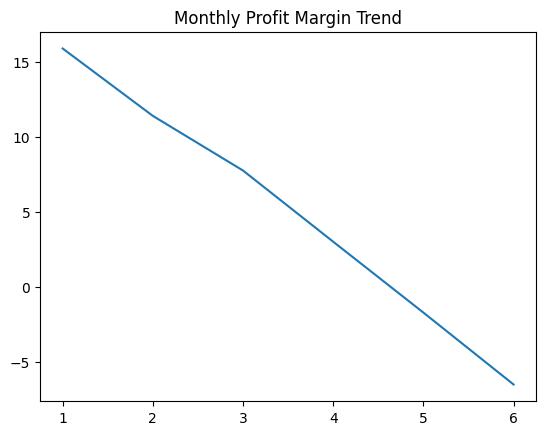

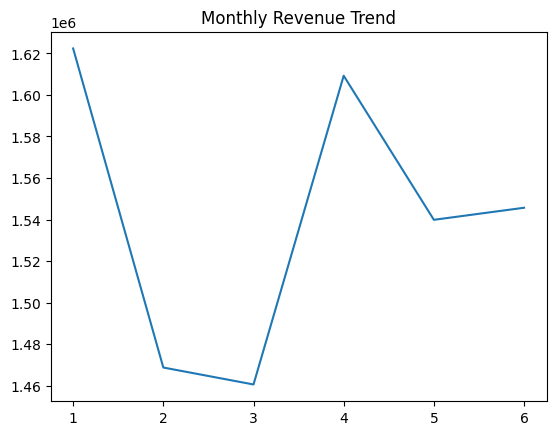

In [45]:

plt.plot(monthly_summary['Month'], monthly_summary['Profit_Margin'])
plt.title("Monthly Profit Margin Trend")
plt.show()


plt.plot(monthly_summary['Month'], monthly_summary['Sales'])
plt.title("Monthly Revenue Trend")
plt.show()